In [1]:
import sys
sys.path.append('/Users/jinchen/Desktop/DSE/IntroML/Project/project-product-price-prediction')

In [15]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from final.feature_extraction.vectorization import text_vectorizaion
from final.dimension_reduction.feature_reduction import dimension_reduction

matplotlib.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.constrained_layout.use'] = True

# Load the Sample Data
- Sample data is already clean

In [3]:
df = pd.read_csv("../../data/random_samples/stratified_sampling_clean_text_data_by_price_whigh_sz50000_1619835594.csv")
df.shape

(50000, 34)

In [4]:
df.head(3)

,train_id,clean_item_description,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,...,item_name_after_avg_word_len,item_condition_id,category_name,brand_name,shipping,price,c1,c2,c3,price_bin
0,806824,new tags,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,...,5.250000,1,Women/Athletic Apparel/Shirts & Tops,Nike,1,15.0,women,athletic apparel,shirts & tops,"(10, 15]"
1,772820,nastasya every hills lipstick fashion,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,...,10.000000,1,Beauty/Makeup/Lips,Anastasia Beverly Hills,0,22.0,beauty,makeup,lips,"(20, 25]"
2,1423115,brand new tags taken bag pictures,11.0,54.0,4.909091,0.0,1.0,5.0,0.0,0.0,...,6.166667,1,Women/Jeans/Leggings,LuLaRoe,0,54.0,women,jeans,leggings,"(50, 60]"


In [5]:
df.clean_item_description[12]

'corners bottom great shape lips smells markings inside cleanthere small water mark indicated third photo comes dusting'

# Text Feature Extraction

In [6]:
# if tfidf = True using TfidfVectorizer, else using CountVectorizer
# max_features: max number of feature generated for the input text string
description_feature,  description_feature_name = text_vectorizaion(df, text_col = "clean_item_description", 
                                                                   tfidf = True, min_df=10, max_features=100000)

In [7]:
description_feature.shape

(50000, 14230)

In [29]:
type(description_feature)

scipy.sparse.csr.csr_matrix

In [8]:
description_feature_name[1:10000:1000]

['005',
 'armour',
 'box accessories',
 'color transfer',
 'dismounted',
 'fourth picture',
 'ignored',
 'like men',
 'most',
 'painless steel']

# Dimension Reduction
### Selection from: PCA, SVD, LatentDA, KMeans, Isomap
#### Result data will be used to input to regression/classification model

In [30]:
data = dimension_reduction(description_feature.toarray(), method = 'SVD', n_comp = 100)

In [31]:
data.shape

(50000, 100)

#  Visualization

In [33]:
# reduce dimension to 2 using tsne
tsne_model = TSNE(n_components=2, verbose=1, random_state=2904, n_iter=250)
tsne_kmeans = tsne_model.fit_transform(model)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.424s...
[t-SNE] Computed neighbors for 50000 samples in 442.305s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for s

In [34]:
vis_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
vis_df['category'] = df['c1']
vis_df['price'] = df['price_bin']

<AxesSubplot:xlabel='x', ylabel='y'>

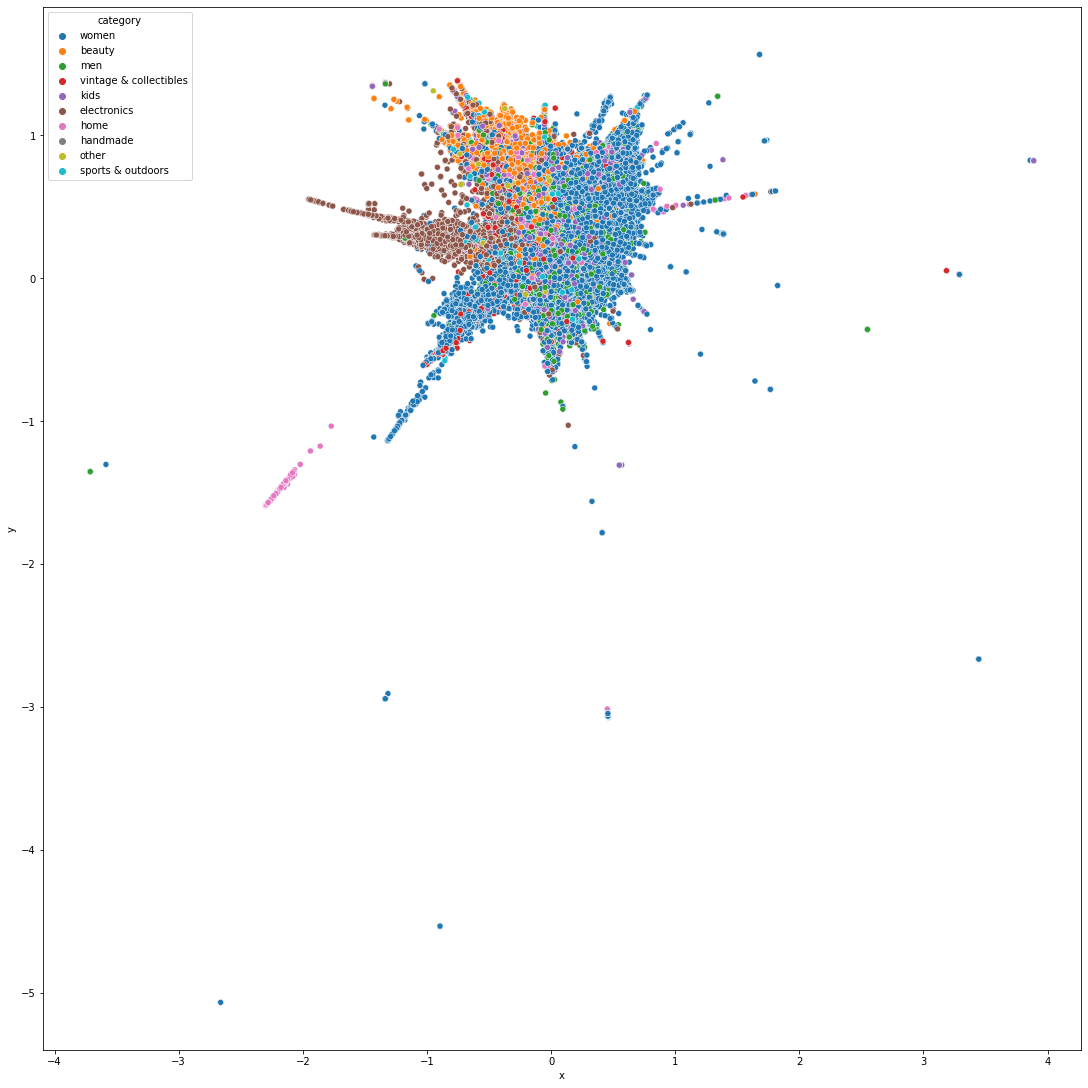

In [36]:
sns.scatterplot(data=vis_df, x='x', y='y', hue='category')

<AxesSubplot:xlabel='x', ylabel='y'>

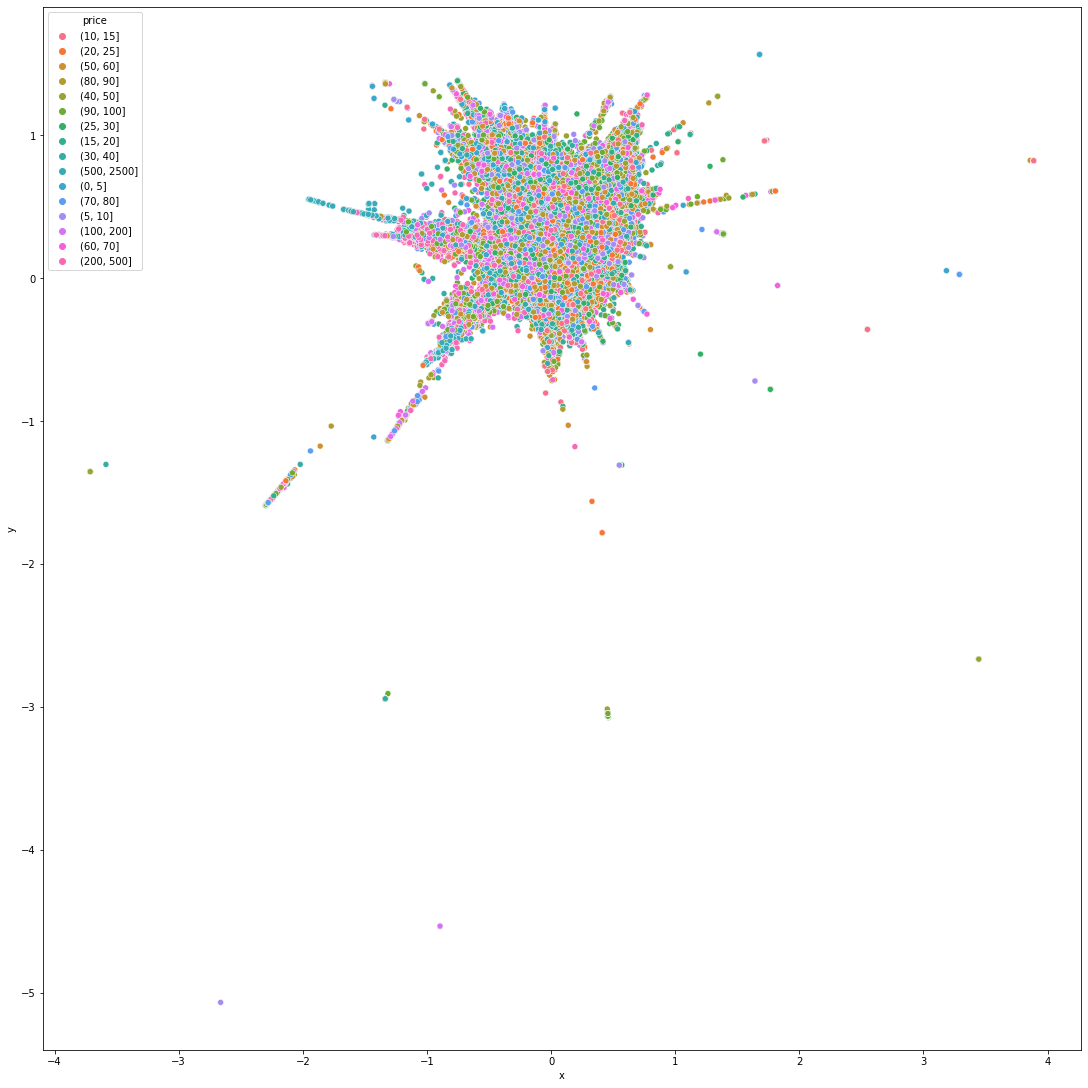

In [37]:
sns.scatterplot(data=vis_df, x='x', y='y', hue='price')